In [89]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import sys, os
sys.path.append(os.path.abspath('..'))
import Eigen.Eigs
reload(Eigen.Eigs)
from Eigen.Eigs import Eig

import Eigen.PowerMethod
reload(Eigen.PowerMethod)
from Eigen.PowerMethod import PWM

# Exercise 11
Solved using the class Eig that correspond to the usage of np.linalg.eigs

In [90]:
print("Matrix A\n")
A = np.array([[0,0,1/2,1/2,0],
              [1/3,0,0,0,0],
              [1/3,1/2,0,1/2,1],
              [1/3,1/2,0,0,0],
              [0,0,1/2,0,0]])
print("\n")

m = 0.15
n = 5

S = 1/n*np.ones((n,n))

M = (1-m)*A+m*S

print("Matrix M\n")
print(M)
print("\n")

eig = Eig(M)

eig.show()

Matrix A



Matrix M

[[0.03       0.03       0.455      0.455      0.03      ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.31333333 0.455      0.03       0.455      0.88      ]
 [0.31333333 0.455      0.03       0.03       0.03      ]
 [0.03       0.03       0.455      0.03       0.03      ]]


values (sorted descending):
  λ1 = 1
  λ2 = 0.29
  λ3 = -0.26+0.24j
  λ4 = -0.26+-0.24j
  λ5 = -0.61

vectors (columns):


,v1 (λ=1),v2 (λ=0.29),v3 (λ=-0.26+0.24j),v4 (λ=-0.26+-0.24j),v5 (λ=-0.61)
x1,-0.49,0.23,-0.68,-0.68,0.52
x2,-0.2,0.23,0.41+0.37j,0.41+-0.37j,-0.24
x3,-0.71,-0.42,0.083+-0.089j,0.083+0.089j,-0.67
x4,-0.28,0.58,0.34+-0.29j,0.34+0.29j,-0.073
x5,-0.37,-0.62,-0.15+0.012j,-0.15+-0.012j,0.47


In [91]:
print("normalized score:\n")
score = eig.vectors[:,0]/sum(eig.vectors[:,0])
print(score)

normalized score:

[0.23714058-0.j 0.09718983-0.j 0.34889409-0.j 0.13849551-0.j
 0.17827999-0.j]


# Exercise 12
Solved using Eig that correspond to np.linalg.eig()

In [92]:
m = 0.15
n = 6
S = 1/n*np.ones((n,n))

print("Matrix A\n")
A = np.array([[0,0,1/2,1/2,0,1/5],[1/3,0,0,0,0,1/5],[1/3,1/2,0,1/2,1,1/5],[1/3,1/2,0,0,0,1/5],[0,0,1/2,0,0,1/5],[0,0,0,0,0,0]])
print(A)
print("\n")

print("Matrix M\n")
M = (1-m)*A + m*S
print(M)
print("\n")

eigA = Eig(A)
eigM = Eig(M)

print("Eigenspaces for matrix A\n")
eigA.show()
print("\n")
print("Eigenspaces for matrix M\n")
eigM.show()

Matrix A

[[0.         0.         0.5        0.5        0.         0.2       ]
 [0.33333333 0.         0.         0.         0.         0.2       ]
 [0.33333333 0.5        0.         0.5        1.         0.2       ]
 [0.33333333 0.5        0.         0.         0.         0.2       ]
 [0.         0.         0.5        0.         0.         0.2       ]
 [0.         0.         0.         0.         0.         0.        ]]


Matrix M

[[0.025      0.025      0.45       0.45       0.025      0.195     ]
 [0.30833333 0.025      0.025      0.025      0.025      0.195     ]
 [0.30833333 0.45       0.025      0.45       0.875      0.195     ]
 [0.30833333 0.45       0.025      0.025      0.025      0.195     ]
 [0.025      0.025      0.45       0.025      0.025      0.195     ]
 [0.025      0.025      0.025      0.025      0.025      0.025     ]]


Eigenspaces for matrix A

values (sorted descending):
  λ1 = 1
  λ2 = 0.34
  λ3 = 0
  λ4 = -0.31+0.28j
  λ5 = -0.31+-0.28j
  λ6 = -0.72

vectors (

,v1 (λ=1),v2 (λ=0.34),v3 (λ=0),v4 (λ=-0.31+0.28j),v5 (λ=-0.31+-0.28j),v6 (λ=-0.72)
x1,-0.49,0.23,-0.49,0.68,0.68,0.52
x2,-0.16,0.23,-2e-16,-0.41+-0.37j,-0.41+0.37j,-0.24
x3,-0.73,-0.42,-0.32,-0.083+0.089j,-0.083+-0.089j,-0.67
x4,-0.24,0.58,-3.4e-16,-0.34+0.29j,-0.34+-0.29j,-0.073
x5,-0.37,-0.62,-1.5e-16,0.15+-0.012j,0.15+0.012j,0.47
x6,0,0,0.81,0,0,0




Eigenspaces for matrix M

values (sorted descending):
  λ1 = 1
  λ2 = 0.29
  λ3 = 2.3e-17
  λ4 = -0.26+0.24j
  λ5 = -0.26+-0.24j
  λ6 = -0.61

vectors (columns):


,v1 (λ=1),v2 (λ=0.29),v3 (λ=2.3e-17),v4 (λ=-0.26+0.24j),v5 (λ=-0.26+-0.24j),v6 (λ=-0.61)
x1,-0.49,-0.23,-0.49,0.68,0.68,0.52
x2,-0.2,-0.23,1.4e-16,-0.41+-0.37j,-0.41+0.37j,-0.24
x3,-0.71,0.42,-0.32,-0.083+0.089j,-0.083+-0.089j,-0.67
x4,-0.28,-0.58,-3.7e-16,-0.34+0.29j,-0.34+-0.29j,-0.073
x5,-0.36,0.62,3.7e-16,0.15+-0.012j,0.15+0.012j,0.47
x6,-0.052,1.2e-17,0.81,-7e-18,-7e-18,-3.4e-18


In [93]:
print("normalized score for A:\n")
scoreA = eigA.vectors[:,0]/sum(eigA.vectors[:,0])
print(scoreA)
print("\n")
print("normalized score for M:\n")
scoreM = eigM.vectors[:,0]/sum(eigM.vectors[:,0])
print(scoreM)

normalized score for A:

[ 0.24489796-0.j  0.08163265-0.j  0.36734694-0.j  0.12244898-0.j
  0.18367347-0.j -0.        -0.j]


normalized score for M:

[0.23121207-0.j 0.09476009-0.j 0.34017174-0.j 0.13503312-0.j
 0.17382299-0.j 0.025     -0.j]


# Exercise 13
Solved using Eig that correspond to np.linalg.eig()

In [94]:
# --- Matrice di adiacenza (trasposta come fornita) ---
A = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 4
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # 5
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # 6
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],  # 7
    [0, 0, 0, 0, 0, 0, 1/3, 0, 0, 0],  # 8
    [0, 0, 0, 0, 0, 0, 1/3, 0, 0, 0],  # 9
    [0, 0, 0, 0, 0, 0, 1/3, 0, 0, 0]   # 10
])

m = 0.15
n = 10
S = 1/n*np.ones((n,n))

print("Matrix A\n")
print(A)
print("\n")

print("Matrix M\n")
M = (1-m)*A + m*S
print(M)
print("\n")

eigM = Eig(M)

print("\n")
print("Eigenspaces for matrix M\n")
eigM.show()

Matrix A

[[0.         1.         1.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0. 

,v1 (λ=0.95),v2 (λ=0.85),v3 (λ=0.21),v4 (λ=-4.3e-50),v5 (λ=-1.1e-17),v6 (λ=-1.1e-17),v7 (λ=-2.3e-17),v8 (λ=-0.16),v9 (λ=-0.85),v10 (λ=-0.85)
x1,-0.14,-5.8e-16,-0.99,-8.7e-32,1.5e-15,1.5e-15,9.4e-16,-0.99,7.9e-17,4.2e-16
x2,-0.039,-2.1e-16,-0.076,-2.1e-17,0.16+0.13j,0.16+-0.13j,0.2,0.067,-4.2e-17,-7.5e-17
x3,-0.039,-6.4e-17,-0.076,-3.5e-17,-0.32+-0.17j,-0.32+0.17j,-0.15,0.067,1.3e-17,1.4e-17
x4,-0.039,-1.2e-16,-0.076,9.3e-17,0.16+0.039j,0.16+-0.039j,-0.044,0.067,-2.6e-17,-5.9e-17
x5,-0.37,-0.55,0.025,1.8e-18,-1.4e-16,-1.4e-16,-1.3e-16,0.011,0.71,-2.7e-17
x6,-0.37,-0.55,0.025,2.6e-18,-4.1e-17,-4.1e-17,-4.3e-17,0.011,-0.71,-2.7e-17
x7,-0.72,0.55,0.065,4.5e-17,-1.1e-16,-1.1e-16,6.3e-17,0.037,-0.062,-0.87
x8,-0.25,0.18,0.012,-3.9e-17,0.73,0.73,0.79,0.0019,0.021,0.29
x9,-0.25,0.18,0.012,-0.71,-0.37,-0.37,-0.39,0.0019,0.021,0.29
x10,-0.25,0.18,0.012,0.71,-0.37,-0.37,-0.39,0.0019,0.021,0.29


In [95]:
print("normalized score for M:\n")
scoreM = eigM.vectors[:,0]/sum(eigM.vectors[:,0])
print(scoreM)

normalized score for M:

[0.05810737-0.j 0.01577936-0.j 0.01577936-0.j 0.01577936-0.j
 0.14909242-0.j 0.14909242-0.j 0.28985433-0.j 0.10217179-0.j
 0.10217179-0.j 0.10217179-0.j]


In [96]:
m = 0.01
n = 10
S = 1/n*np.ones((n,n))

print("Matrix A\n")
print(A)
print("\n")

print("Matrix M\n")
M = (1-m)*A + m*S
print(M)
print("\n")

eigM = Eig(M)

print("\n")
print("Eigenspaces for matrix M\n")
eigM.show()

Matrix A

[[0.         1.         1.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0. 

,v1 (λ=1),v2 (λ=0.99),v3 (λ=0.056),v4 (λ=2.8e-17),v5 (λ=0),v6 (λ=-1.4e-17),v7 (λ=-1.4e-17),v8 (λ=-0.052),v9 (λ=-0.99),v10 (λ=-0.99)
x1,-0.0089,-2e-15,-1,6.7e-15,3.4e-30,-3.7e-14,-3.7e-14,1,1.3e-17,8e-16
x2,-0.0022,2e-16,-0.019,0.28,-6.1e-17,0.67,0.67,-0.018,-2.5e-17,-2e-16
x3,-0.0022,-4.2e-16,-0.019,0.24,-8.4e-18,-0.37+-0.26j,-0.37+0.26j,-0.018,3.1e-17,-2.4e-16
x4,-0.0022,-2.3e-16,-0.019,-0.52,-3.5e-17,-0.29+0.26j,-0.29+-0.26j,-0.018,-1.9e-17,-2.3e-16
x5,-0.37,0.55,0.0011,-9.2e-17,-3.5e-17,-5.7e-17,-5.7e-17,-0.0009,-0.7,-7.3e-17
x6,-0.37,0.55,0.0011,5.8e-17,-2.7e-17,-2e-17,-2e-17,-0.0009,0.7,1.4e-17
x7,-0.74,-0.55,0.0032,-4.5e-17,9.6e-18,3.3e-16,3.3e-16,-0.0028,0.15,-0.87
x8,-0.25,-0.18,0.00041,-0.63,4.9e-17,0.014+-0.36j,0.014+0.36j,-0.00027,-0.05,0.29
x9,-0.25,-0.18,0.00041,0.32,-0.71,-0.0072+0.18j,-0.0072+-0.18j,-0.00027,-0.05,0.29
x10,-0.25,-0.18,0.00041,0.32,0.71,-0.0072+0.18j,-0.0072+-0.18j,-0.00027,-0.05,0.29


In [97]:
print("normalized score for M:\n")
scoreM = eigM.vectors[:,0]/sum(eigM.vectors[:,0])
print(scoreM)

normalized score for M:

[0.00399762-0.j 0.00100397-0.j 0.00100397-0.j 0.00100397-0.j
 0.16549841-0.j 0.16549841-0.j 0.33049331-0.j 0.11050011-0.j
 0.11050011-0.j 0.11050011-0.j]


In [98]:
m = 0.99
n = 10
S = 1/n*np.ones((n,n))

print("Matrix A\n")
print(A)
print("\n")

print("Matrix M\n")
M = (1-m)*A + m*S
print(M)
print("\n")

eigM = Eig(M)

print("\n")
print("Eigenspaces for matrix M\n")
eigM.show()

Matrix A

[[0.         1.         1.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.         0. 

,v1 (λ=1),v2 (λ=0.01),v3 (λ=0.006),v4 (λ=4.1e-19),v5 (λ=-1.3e-51),v6 (λ=-8.1e-20),v7 (λ=-3.1e-19),v8 (λ=-0.005),v9 (λ=-0.01),v10 (λ=-0.01)
x1,-0.32,-1.8e-15,-0.8,-8.9e-16,1.4e-30,-9.6e-15,8e-15,0.9,-5.1e-17,-2.6e-17
x2,-0.31,-1.5e-16,-0.13,-0.061,1.5e-16,-0.82,0.66,-0.18,4.3e-16,2.3e-16
x3,-0.31,-4.3e-16,-0.13,0.23,2e-18,0.42,-0.68,-0.18,9.3e-17,-3e-18
x4,-0.31,-6.4e-16,-0.13,-0.17,-1.1e-16,0.39,0.013,-0.18,7e-17,-1.8e-16
x5,-0.32,-0.55,0.2,3.5e-16,8.9e-18,4.4e-15,-3.6e-15,-0.059,-5.8e-11,0.71
x6,-0.32,-0.55,0.2,3.3e-16,8.3e-18,4.6e-15,-3.7e-15,-0.059,5.8e-11,-0.71
x7,-0.32,0.55,0.44,6.6e-17,-1.8e-18,6.2e-16,-6.6e-16,-0.29,0.87,0.035
x8,-0.31,0.18,0.12,0.78,-1.3e-17,2e-16,0.26,0.019,-0.29,-0.012
x9,-0.31,0.18,0.12,-0.39,-0.71,-1.3e-16,-0.13,0.019,-0.29,-0.012
x10,-0.31,0.18,0.12,-0.39,0.71,-1.3e-16,-0.13,0.019,-0.29,-0.012


In [99]:
print("normalized score for M:\n")
scoreM = eigM.vectors[:,0]/sum(eigM.vectors[:,0])
print(scoreM)

normalized score for M:

[0.10207723 0.09910116 0.09910116 0.09910116 0.10010321 0.10010321
 0.10208746 0.0994418  0.0994418  0.0994418 ]


# Exercise 14
The following exercise is solved using the power method

In [100]:
print("Matrix A\n")
A = np.array([[0,0,1/2,1/2,0],
              [1/3,0,0,0,0],
              [1/3,1/2,0,1/2,1],
              [1/3,1/2,0,0,0],
              [0,0,1/2,0,0]])
print("\n")

m = 0.15
n = 5

S = 1/n*np.ones((n,n))

M = (1-m)*A+m*S

print("Matrix M\n")
print(M)
print("\n")

eig = Eig(M)

eig.show()

Matrix A



Matrix M

[[0.03       0.03       0.455      0.455      0.03      ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.31333333 0.455      0.03       0.455      0.88      ]
 [0.31333333 0.455      0.03       0.03       0.03      ]
 [0.03       0.03       0.455      0.03       0.03      ]]


values (sorted descending):
  λ1 = 1
  λ2 = 0.29
  λ3 = -0.26+0.24j
  λ4 = -0.26+-0.24j
  λ5 = -0.61

vectors (columns):


,v1 (λ=1),v2 (λ=0.29),v3 (λ=-0.26+0.24j),v4 (λ=-0.26+-0.24j),v5 (λ=-0.61)
x1,-0.49,0.23,-0.68,-0.68,0.52
x2,-0.2,0.23,0.41+0.37j,0.41+-0.37j,-0.24
x3,-0.71,-0.42,0.083+-0.089j,0.083+0.089j,-0.67
x4,-0.28,0.58,0.34+-0.29j,0.34+0.29j,-0.073
x5,-0.37,-0.62,-0.15+0.012j,-0.15+-0.012j,0.47


In [101]:
print("normalized score:\n")
score = eig.vectors[:,0]/sum(eig.vectors[:,0])
print(score)

normalized score:

[0.23714058-0.j 0.09718983-0.j 0.34889409-0.j 0.13849551-0.j
 0.17827999-0.j]


Now the computiation of the score using the power method



The factor c:  0.94


the approximation of the eigenvalue with 1 iteration:  1.4214583333333333
the ratio computed with 1 iteration:  0.1444826166493673
the score computed with 1 iteration: 
 [[0.2       ]
 [0.08666667]
 [0.42666667]
 [0.17166667]
 [0.115     ]]


the approximation of the eigenvalue with 5 iteration:  1.0627849294253258
the ratio computed with 5 iteration:  0.9924867621285083
the score computed with 5 iteration: 
 [[0.22804379]
 [0.10194587]
 [0.35998866]
 [0.13968546]
 [0.17033622]]


the approximation of the eigenvalue with 10 iteration:  0.995009498498682
the ratio computed with 10 iteration:  0.9983948032301513
the score computed with 10 iteration: 
 [[0.23787658]
 [0.09685156]
 [0.34793858]
 [0.13838955]
 [0.17894373]]


the approximation of the eigenvalue with 50 iteration:  0.9999999999859268
the ratio computed with 50 iteration:  0.9999999999955353
the score computed with 50 iteration: 
 [[0.23714058]
 [0.09718983]
 [0.34889409]
 [0.13849551]
 [0.17827999]]



/tmp/ipykernel_5617/917451475.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


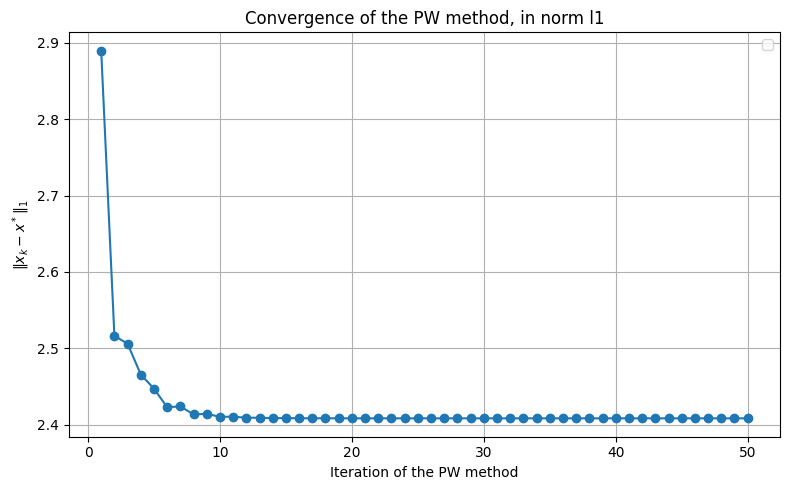

In [113]:
x_1,lam_1,c,x_seq_1,ratio_1 = PWM(M=M,x_0=np.ones((M.shape[0],1)),k=1,tol=10**-8,real_x=score)
x_5,lam_5,c,x_seq_5,ratio_5 = PWM(M=M,x_0=np.ones((M.shape[0],1)),k=5,tol=10**-8,real_x=score)
x_10,lam_10,c,x_seq_10,ratio_10 = PWM(M=M,x_0=np.ones((M.shape[0],1)),k=10,tol=10**-8,real_x=score)
x_50,lam_50,c,x_seq_50,ratio_50 = PWM(M=M,x_0=np.ones((M.shape[0],1)),k=50,tol=10**-8,real_x=score)

print("\n")
print("The factor c: ", c)
print("\n")
print("the approximation of the eigenvalue with 1 iteration: ",lam_1)
print("the ratio computed with 1 iteration: ", ratio_1)
print("the score computed with 1 iteration: \n", x_1)
print("\n")
print("the approximation of the eigenvalue with 5 iteration: ",lam_5)
print("the ratio computed with 5 iteration: ", ratio_5)
print("the score computed with 5 iteration: \n", x_5)
print("\n")
print("the approximation of the eigenvalue with 10 iteration: ",lam_10)
print("the ratio computed with 10 iteration: ", ratio_10)
print("the score computed with 10 iteration: \n", x_10)
print("\n")
print("the approximation of the eigenvalue with 50 iteration: ",lam_50)
print("the ratio computed with 50 iteration: ", ratio_50)
print("the score computed with 50 iteration: \n", x_50)
print("\n")


plt.figure(figsize=(8, 5))


y = [v for v in x_seq_50 if v is not None]

plt.plot(range(1, len(y) + 1), y, marker='o')
plt.xlabel("Iteration of the PW method")
plt.ylabel(r"$\|x_k - x^*\|_1$")
plt.title("Convergence of the PW method, in norm l1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()